# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
# 15 baris pertama
df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [ ]:
# untuk menampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [ ]:
#mengecek nilai kosong
print(df.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
#menghapus nilai kosong
df.dropna(inplace=True)

In [ ]:
#menghapus kolom 'date'
df.drop(columns=['date'], inplace=True )

In [ ]:
df.head(15)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
7,0.0,10.0,2.8,2.0,sun
8,4.3,9.4,5.0,3.4,rain
9,1.0,6.1,0.6,3.4,rain


In [ ]:
#mengecek data yang memiliki nilai duplikat
df_duplicate = df.duplicated().sum()

In [ ]:
#menghapus data yang merupakan duplikat
df = df.drop_duplicates()

## **Visualisasi**

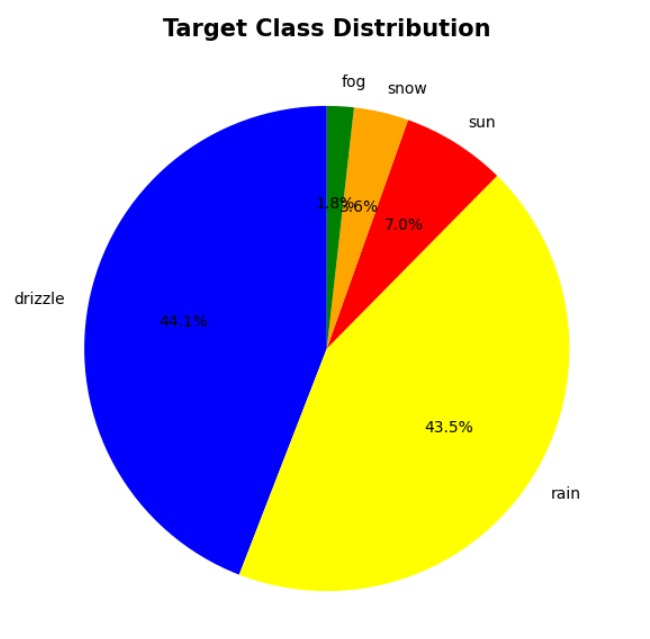

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labels = ['drizzle', 'rain', 'sun', 'snow', 'fog']
sizes = [44.1, 43.5, 7.0, 3.6, 1.8]
colors = ['blue', 'yellow', 'red', 'orange', 'green']

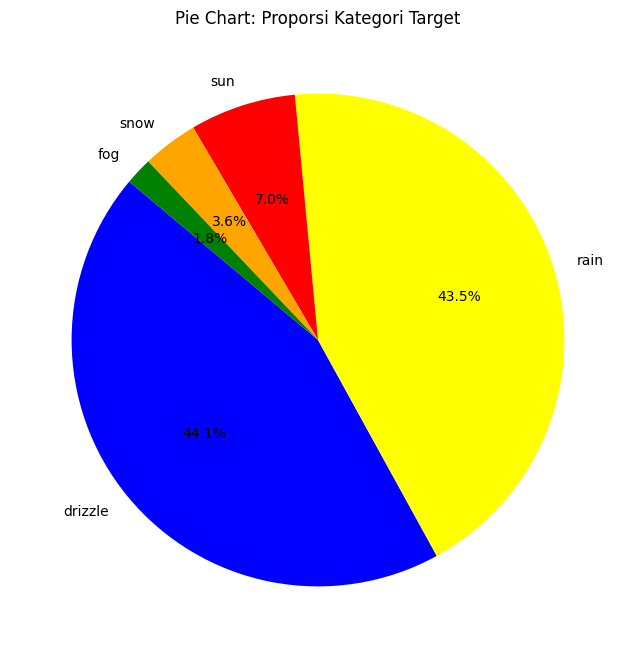

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df.weather.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Proporsi Kategori Target')
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('seattle-weather.csv')

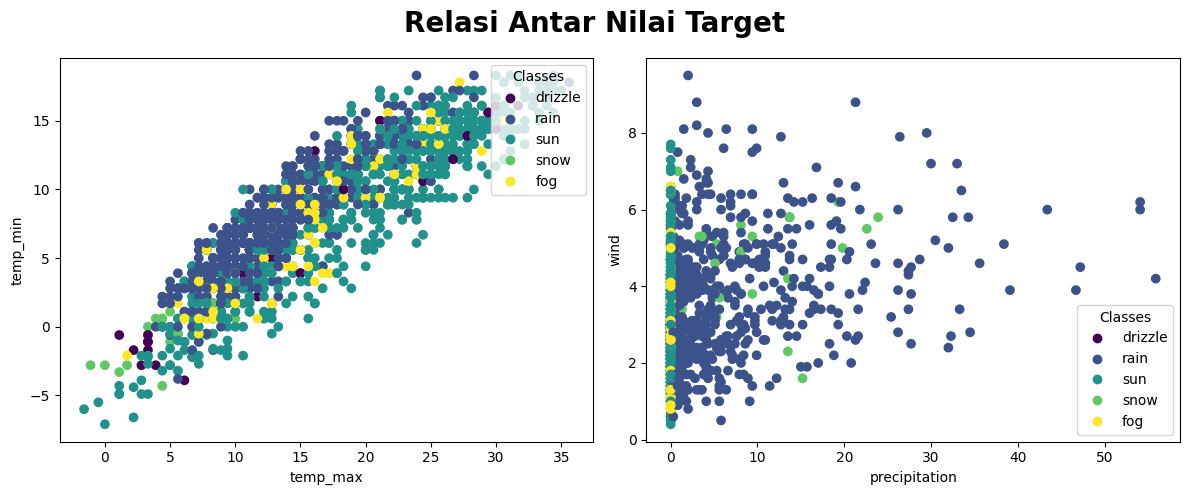

In [ ]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({ 'drizzle': 0,
  'rain': 1,
  'sun':2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

In [ ]:
#import seaborn as sns

<Axes: xlabel='temp_min', ylabel='Count'>

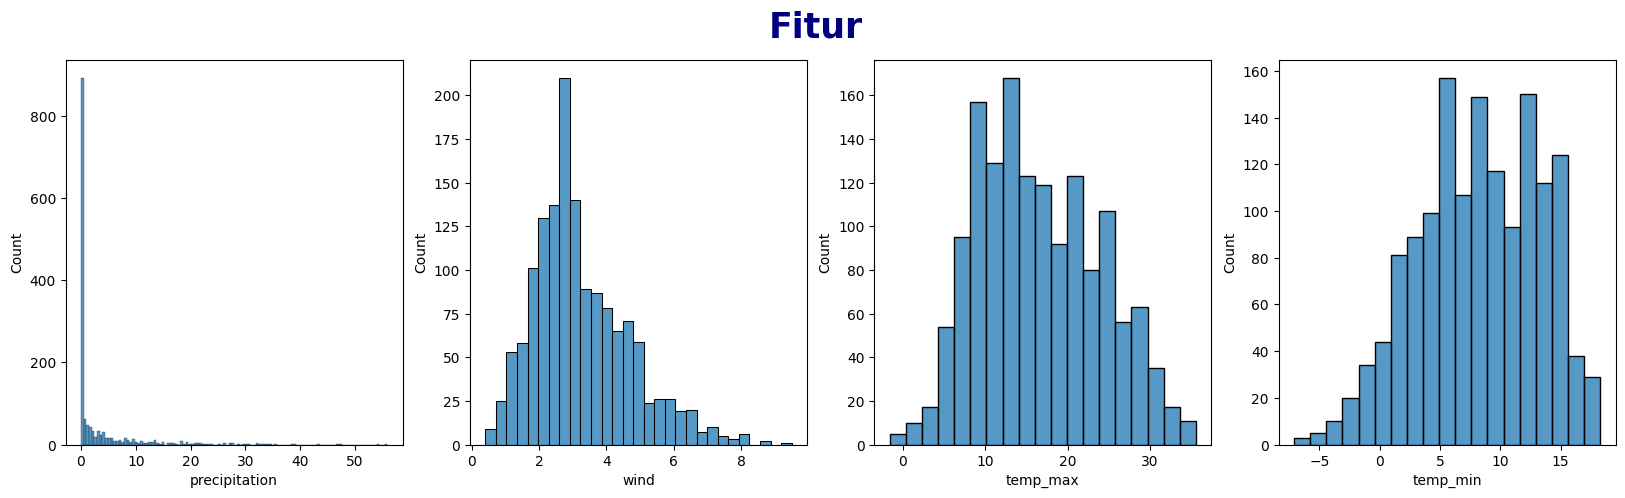

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='precipitation', ax=axes[0])

# axis 2
sns.histplot(data=df, x='wind', ax=axes[1])

# axis 3
sns.histplot(data=df, x='temp_max', ax=axes[2])

# axis 4
sns.histplot(data=df, x='temp_min', ax=axes[3])

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# membaca dataset
df = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
# Memisahkan fitur dan label
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
# Alternatif
# x = df.drop('harga', axis=1)
# y = df['harga']

In [ ]:
# membagi data menjadi data training dan data testing dengan perbandingan 80:20
# Random state digunakan untuk mengatur agar pembagian data menjadi sama setiap kali dijalankan (dapat diisi dengan angka berapapun)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
# menampilkan ukuran data training dan data testing
trainRatio = round(x_train.shape[0]/len(df), 2)*100
testRatio = round(x_test.shape[0]/len(df), 2)*100

In [ ]:
print(f'Train set: {x_train.shape[0]} ({trainRatio}%)')
print(f'Test set: {x_test.shape[0]} ({testRatio}%)')

Train set: 1168 (80.0%)
Test set: 293 (20.0%)


6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

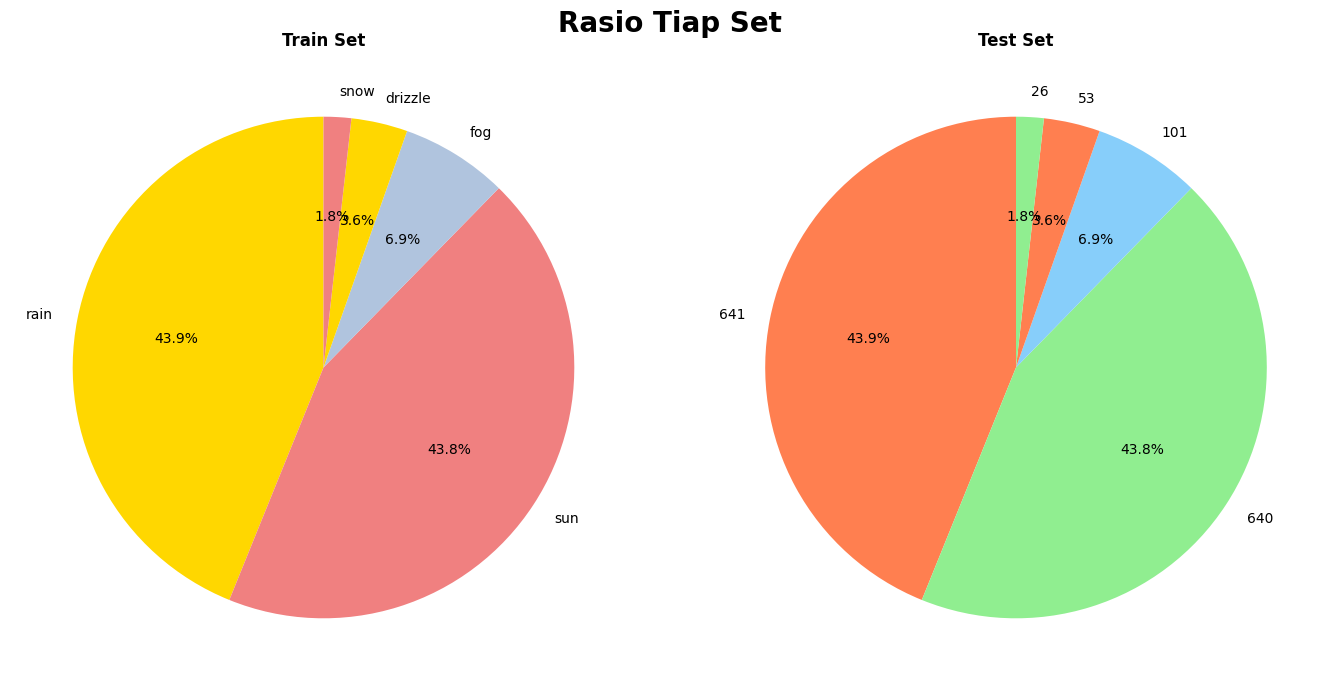

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].value_counts()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(target_names, labels=target_names.index, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(df['weather'].value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [ ]:
#import library utama
import pandas as pd #digunakan untuk analisis data
import matplotlib.pyplot as plt #menampilkan visual
import numpy as np #digunakan untuk komputasi matriks

In [ ]:
df = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
df.drop(columns=['date'], inplace=True )

In [ ]:
#menampilkan 5 data utama
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [ ]:
#variabel x adalah variabel yang memuat atribut
#variablel y adalah variabel yang membuat tabel
x = df.iloc[:, [1, 2]].values
y = df.iloc[:, -1].values

In [ ]:
print(x)

[[12.8  5. ]
 [10.6  2.8]
 [11.7  7.2]
 ...
 [ 7.2  0.6]
 [ 5.6 -1. ]
 [ 5.6 -2.1]]


In [ ]:
print(y)

['drizzle' 'rain' 'rain' ... 'fog' 'sun' 'sun']


In [ ]:
#membagi dataset ke data training dan data testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print(x_train)

[[13.3  8.3]
 [16.1  7.2]
 [11.1  7.8]
 ...
 [18.3  8.9]
 [26.1 11.1]
 [10.6  7.2]]


In [ ]:
len(x_train)

1095

In [ ]:
len(x)

1461

In [ ]:
len(x_test)

366

In [ ]:
print(y_train)

['rain' 'sun' 'rain' ... 'sun' 'sun' 'rain']


In [ ]:
len(y_train)

1095

In [ ]:
len(y_test)

366

In [ ]:
#scalling data digunakan agar jarak antar data tidak terlalu jauh

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.41329488  0.03412509]
 [-0.03457403 -0.18232393]
 [-0.71086126 -0.06426083]
 ...
 [ 0.26299236  0.15218819]
 [ 1.31800044  0.58508622]
 [-0.77848998 -0.18232393]]


In [ ]:
print(x_test)

[[ 0.49293002  0.80153523]
 [-0.77848998 -0.06426083]
 [-0.26451169  0.3686372 ]
 [ 1.02043406 -0.06426083]
 [-0.4809236  -0.18232393]
 [-0.4809236  -0.28070984]
 [-0.62970679 -0.06426083]
 [ 0.72286767  1.23443326]
 [ 0.57408448  0.03412509]
 [-0.41329488 -0.73328506]
 [ 1.84550448  1.68700848]
 [-1.08958211 -0.61522196]
 [ 0.64171321  1.23443326]
 [ 1.31800044  1.68700848]
 [ 0.41177555  0.2505741 ]
 [ 0.49293002  0.15218819]
 [ 1.16921725  1.23443326]
 [-0.94079892 -0.61522196]
 [-1.00842764 -0.94973407]
 [-0.18335722  0.2505741 ]
 [-0.4809236   0.15218819]
 [-0.71086126 -0.61522196]
 [-0.85964445 -1.04811999]
 [ 1.69672129  1.35249636]
 [ 1.5479381   1.01798425]
 [ 1.08806278  1.23443326]
 [ 0.26299236  0.2505741 ]
 [-1.00842764 -0.39877294]
 [ 0.93927959  0.80153523]
 [ 0.11420916 -0.61522196]
 [-1.00842764 -0.73328506]
 [-0.56207807 -0.28070984]
 [-1.30599403 -0.94973407]
 [-1.00842764 -1.04811999]
 [-0.71086126  0.03412509]
 [ 0.87165087 -0.06426083]
 [-0.10220275 -0.61522196]
 

In [ ]:
#memanggil function KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#menentukan prediksi
y_pred = classifier.predict(x_test)

In [ ]:
#evaluasi dan validasi

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  0   1   2   1   7]
 [  0   0  16   0  15]
 [  1   3 129   0  22]
 [  0   0   1   1   4]
 [  0   4  50   1 108]]


In [ ]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.00      0.00      0.00        31
        rain       0.65      0.83      0.73       155
        snow       0.33      0.17      0.22         6
         sun       0.69      0.66      0.68       163

    accuracy                           0.65       366
   macro avg       0.34      0.33      0.33       366
weighted avg       0.59      0.65      0.61       366



In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :65 persen


In [ ]:
#visualisasi data (grafik)

In [ ]:
from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 10, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1000, step=0.01))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Klasifikasi Data dengan K-Nearest Neighbor')
plt.xlabel('Moisture')
plt.ylabel('Temp')
plt.legend()
plt.show()

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [ ]:
#Tingkat Akurasi :65 persen

## **Esai**

9. Berikan kesimpulan dari project yang telah anda buat.

_Tulis **jawaban** no. 9 disini_

Algoritma K-Nearest Neighbors (KNN) adalah salah satu algoritma klasifikasi dan regresi yang paling sederhana dan populer dalam pembelajaran mesin. Algoritma ini bekerja dengan cara menghitung jarak antara data yang akan diprediksi dengan data yang sudah ada dalam dataset, kemudian memilik K data terdekat untuk dijadikan acuan dalam menentukan label kelas dari data yang akan diprediksi.

KNN juga digunakan untuk regresi, yaitu dengan menghitung rata-rata atau median dari K data terdekat sebagai prediksi nilai kontinu dari data yang akan diprediksi

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [ ]:
link_video = "https://drive.google.com/file/d/11Tt8T92DwtxVarcextY_I_FYzV0JqnF-/view?usp=sharing"
link_github = "https://github.com/Yosephineelisa/UTS-BENGKEL-KODING.git"